# Analysis of Fortune's Top Companies of 2021

### Dataset - Fortune 1000

Every year Fortune, an American Business Magazine, publishes the Fortune 500, which ranks the top 500 corporations by revenue. 
However, the dataset used for this study includes all 1000 companies, as opposed to just the top 500.

The Fortune 1000 dataset used for this study has been taken from [here](https://www.kaggle.com/datasets/winston56/fortune-500-data-2021), and contains U.S. company data for the year 2021, with market valuations determined on January 20,2021.
The dataset has 1000 rows and 18 columns/attributes, namely:

|Attribute|Description|Note|Data Type|
|---------|-----------|----|-----|
|Company            | The name of the company| |object|
|Rank               | The ranking given to the company by Fortune in 2021| Values range from 1 (most revenue) to 1000 (least revenue)|object|
|Rank Change        | The change in the company's ranking from 2020 to 2021| Company can only have a change in rank if it is currently in the top 500 and was in the top 500 the year before|int64|
|Revenue            | Dollar value for revenue of the company in millions| Companies are ranked through this attribute|float64|
|Profit             | Dollar value for profit of the company in millions| |float64|
|Number of Employees| Number of people the company has employed| |int64|
|Sector             | The sector of the market the company operates in| |object|
|City               | The city where the company has its headquarters | All the companies are in the United Stated |object|
|State              | The state where the company has its headquarters | All the companies are in the United Stated |object|
|Newcomer           | Indicates whether the company is new to the top Fortune 500|  No value assigned to companies outside of the top 500|object (yes/no)|
|CEO Founder        | Indicates whether the current CEO of the company is also its founder| |object (yes/no)|
|CEO Woman          | Indicates whether the CEO of the company is a woman | | object (yes/no)|
|Profitable         | Indicates whether the company has profited over the last year or not| |object (yes/no)|
|Previous Rank      | The ranking given to the company by Fortune in 2020| No value assigned to companies outside of the top 500|float64|
|CEO                | The name of the CEO of the company| |object|
|Website            | The url to the company's website| |object|
|Ticker             | The stock ticker symbol of the company| Values assigned only for public companies, value is null if the company is privately-owned|object|
|Market Cap         | The total dollar market value of the company's outstanding shares of stock in millions| Values null in the case of some private companies|float64|


In addition to this, key factors regarding the spread and centrality shall be discussed, followed by a systematic approach to clean the dataset by resolving inconsistencies, removing missing values and replacing outliers.




# Part 1 – Preparing for Data Scaling (0 marks)
- Importing Modules
- Importing Dataset
- Cleaning 
- Encoding

### Importing Pandas and Matplotlib
- When using Jupyter Notebook with a dark editor the axes, tick, text etc. are difficult with a black theme to see since they are black by default so I will change them to gray
- Adjust font size
- Import Pandas and Matplotlib

In [165]:
import matplotlib as mpl

font = {'family' : 'Georgia',
        'weight' : 'bold',
        'size'   : 16}

COLOR = 'gray'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

mpl.rc('font', **font)

import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

### Retrieving the dataset and sorting by rank

In [166]:
df = pd.read_csv("Fortune_1000.csv", index_col=['rank']).sort_index()
df.head(10)

,company,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
rank,,,,,,,,,,,,,,,,,
1,Walmart,0,523964.00,14881.00,2200000,Retailing,Bentonville,AR,no,no,no,yes,1,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
2,Amazon,3,280522.00,11588.00,798000,Retailing,Seattle,WA,no,yes,no,yes,5,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
3,Exxon Mobil,-1,264938.00,14340.00,74900,Energy,Irving,TX,no,no,no,yes,2,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
4,Apple,-1,260174.00,55256.00,137000,Technology,Cupertino,CA,no,no,no,yes,3,Timothy D. Cook,https://www.apple.com,AAPL,2221176
5,CVS Health,3,256776.00,6634.00,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8,Karen S. Lynch,https://www.cvshealth.com,CVS,98496
6,Berkshire Hathaway,-2,254616.00,81417.00,391500,Financials,Omaha,NE,no,no,no,yes,4,Warren E. Buffett,https://www.berkshirehathaway.com,BRKA,550878
7,UnitedHealth Group,-1,242155.00,13839.00,325000,Health Care,Minnetonka,MN,no,no,no,yes,6,Andrew P. Witty,https://www.unitedhealthgroup.com,UNH,332885
8,McKesson,-1,214319.00,34.00,70000,Health Care,Irving,TX,no,no,no,yes,7,Brian S. Tyler,https://www.mckesson.com,MCK,29570
9,AT&T,0,181193.00,13903.00,247800,Telecommunications,Dallas,TX,no,no,no,yes,9,John T. Stankey,https://www.att.com,T,206369


### Removing Attributes

Moreover, some attributes are not needed for this study since they have too many values missing by virtue of their definition or are not relevant, and can be dropped including:
- website 
- prev_rank
- rank_change 
- newcomer 

In [167]:
df = df.drop(columns=['prev_rank', 'rank_change', 'newcomer', 'Website'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   revenue            1000 non-null   float64
 2   profit             998 non-null    float64
 3   num. of employees  1000 non-null   int64  
 4   sector             1000 non-null   object 
 5   city               1000 non-null   object 
 6   state              1000 non-null   object 
 7   ceo_founder        1000 non-null   object 
 8   ceo_woman          1000 non-null   object 
 9   profitable         1000 non-null   object 
 10  CEO                992 non-null    object 
 11  Ticker             938 non-null    object 
 12  Market Cap         960 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 109.4+ KB


### Coerce object types to numeric
Some attributes like Market Cap and prev_rank have object as their dtype instead of int64 and float64, due to presence of null values or spaces (instead of leaving the field blank).

In [168]:
df[['Market Cap']] = df[['Market Cap']].apply(pd.to_numeric, errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   revenue            1000 non-null   float64
 2   profit             998 non-null    float64
 3   num. of employees  1000 non-null   int64  
 4   sector             1000 non-null   object 
 5   city               1000 non-null   object 
 6   state              1000 non-null   object 
 7   ceo_founder        1000 non-null   object 
 8   ceo_woman          1000 non-null   object 
 9   profitable         1000 non-null   object 
 10  CEO                992 non-null    object 
 11  Ticker             938 non-null    object 
 12  Market Cap         950 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB


In [169]:
categorical_attributes = ['sector','ceo_founder','ceo_woman','profitable']
numerical_attributes = ['revenue','profit','num. of employees','Market Cap']
# target_attribute = ["output"]


### Detect and remove rows with missing data

In [170]:
df.isna().sum()

company               0
revenue               0
profit                2
num. of employees     0
sector                0
city                  0
state                 0
ceo_founder           0
ceo_woman             0
profitable            0
CEO                   8
Ticker               62
Market Cap           50
dtype: int64

In [171]:
df = df.dropna()
df.isna().sum()

company              0
revenue              0
profit               0
num. of employees    0
sector               0
city                 0
state                0
ceo_founder          0
ceo_woman            0
profitable           0
CEO                  0
Ticker               0
Market Cap           0
dtype: int64

### Distribution

- Chosen techniques in will Part 2 and 3 will depend on the distribution of the numeric data.   

In [172]:
stats = ['mean', 'median', 'std', 'var']

agg_dict = {}
for attribute in numerical_attributes:
    agg_dict[attribute] = stats

desc_stats = df.agg(agg_dict)

In [173]:
df.describe()

,revenue,profit,num. of employees,Market Cap
count,928.00,928.00,928.00,928.00
mean,16238.10,1394.88,36120.82,35106.26
std,35839.55,4669.32,95058.34,130847.39
min,1990.30,-8506.00,51.00,2.20
25%,3164.20,108.97,7010.50,1715.50
50%,5647.00,381.75,13825.00,6587.50
75%,12973.17,1134.72,30000.00,22221.25
max,523964.00,81417.00,2200000.00,2221176.00


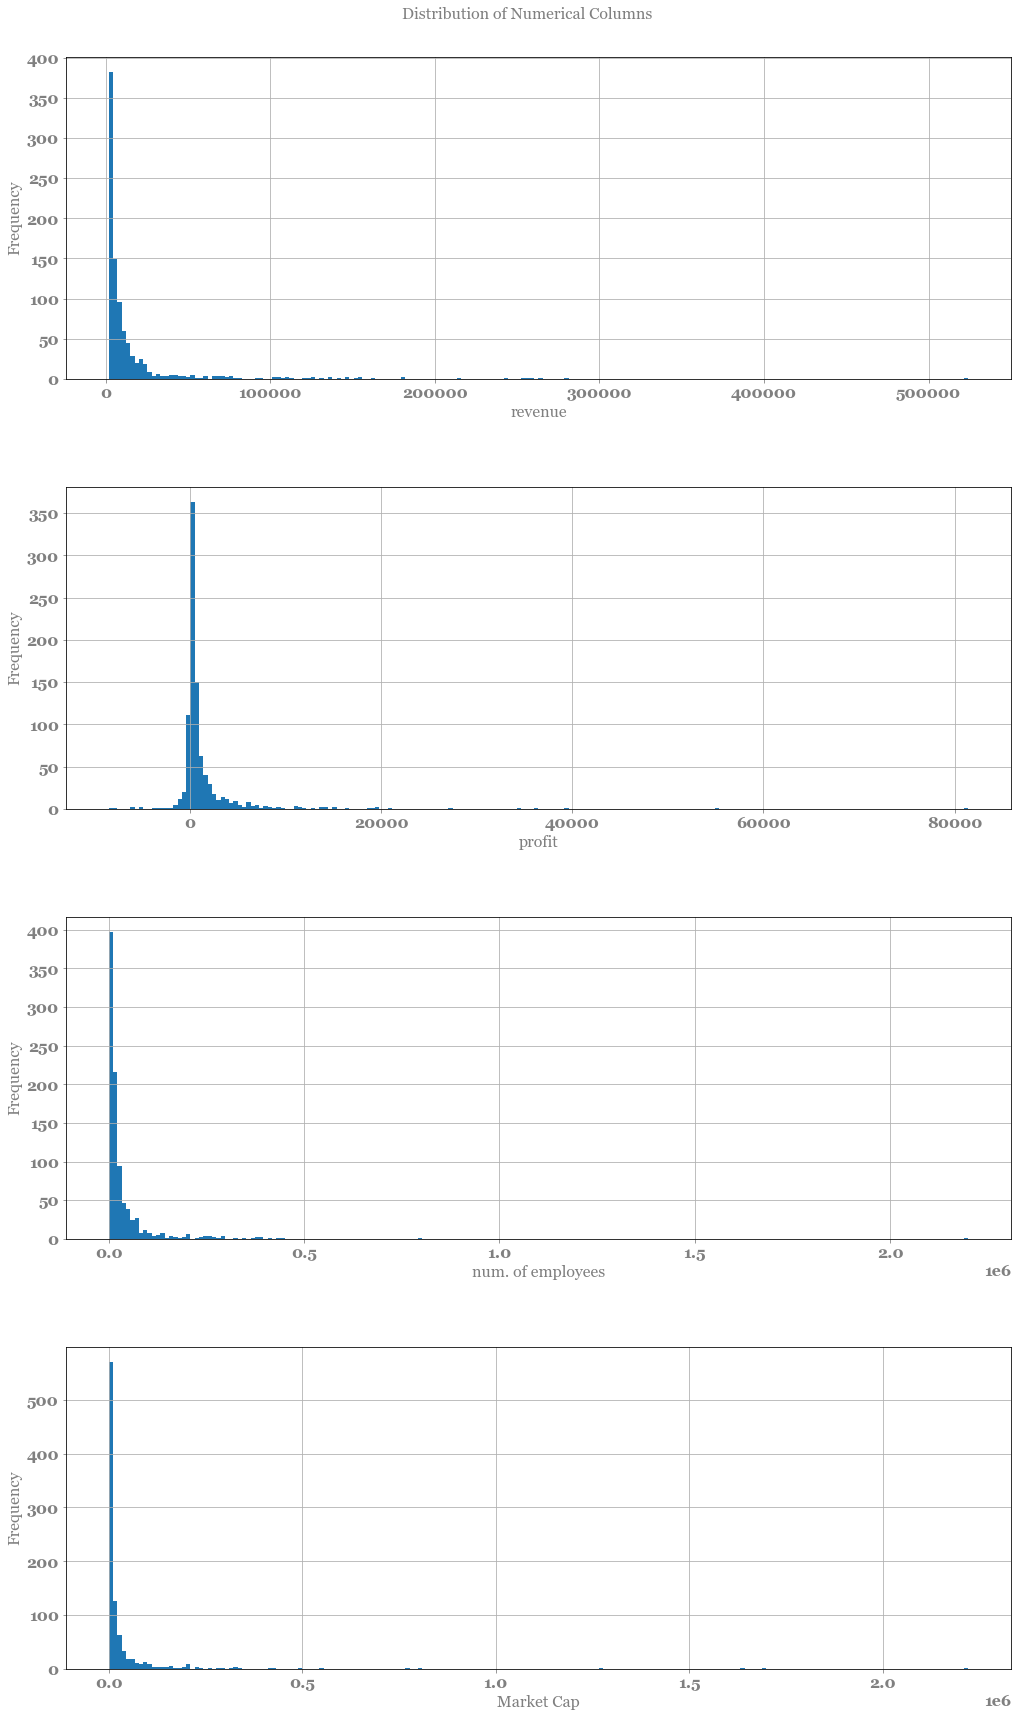

In [174]:
def plot_histograms_density(df, columns, title):
    temp = df.copy()
    fig, axs = plt.subplots(len(columns), 1, figsize = (16,25))
    fig.tight_layout(pad=5.0)
    fig.suptitle(title, fontsize=16)
    
    i = 0
    for col in columns:
        temp[col].hist(ax=axs[i], bins=200)
        axs[i].set_ylabel("Frequency")
        axs[i].set_xlabel(col)
        i += 1

plot_histograms_density(df, numerical_attributes, "Distribution of Numerical Columns")

### Encoding 

- None of the categorical have any inherent order therefore label encoder will be used 

In [180]:
from sklearn.preprocessing import LabelEncoder

def labelEncoder(df, columns, encoder):
    temp = df.copy()
    for col in columns:
        temp[col] = encoder.fit_transform(temp[col])

    return temp

labelEncoder(df, categorical_attributes,  LabelEncoder())

,company,revenue,profit,num. of employees,sector,city,state,ceo_founder,ceo_woman,profitable,CEO,Ticker,Market Cap
rank,,,,,,,,,,,,,
1,Walmart,523964.00,14881.00,2200000,16,Bentonville,AR,0,0,1,C. Douglas McMillon,WMT,411690.00
2,Amazon,280522.00,11588.00,798000,16,Seattle,WA,1,0,1,Jeffrey P. Bezos,AMZN,1637405.00
3,Exxon Mobil,264938.00,14340.00,74900,4,Irving,TX,0,0,1,Darren W. Woods,XOM,177923.00
4,Apple,260174.00,55256.00,137000,17,Cupertino,CA,0,0,1,Timothy D. Cook,AAPL,2221176.00
5,CVS Health,256776.00,6634.00,290000,9,Woonsocket,RI,0,1,1,Karen S. Lynch,CVS,98496.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Mr. Cooper Group,2007.00,274.00,9100,6,Coppell,TX,0,0,1,Jay Bray,COOP,674.10
997,Herc Holdings,1999.00,47.50,5100,2,Bonita Springs,FL,0,0,1,Lawrence H. Silber,HRI,590.50
998,Healthpeak Properties,1997.40,45.50,204,6,Irvine,CA,0,0,1,Thomas M. Herzog,PEAK,12059.30


# Part 2 – Data scaling pre-assessment (27 marks)

|Type            |Scaling Technique       |Kept in experimental design | Justification                                                        |
|----------------|------------------------|----------------------------|----------------------------------------------------------------------|
|Normalization   |  Min-Max               |No                          | Not a good choice for a distribution with outliers or severe skewness|
|Normalization   |  Max-abs               |Yes                         | Does not change its center distribution                              |
|Normalization   |  Robust                |Yes                         | Robust against outliers                                              |
|Normalization   |  Quantile transform    |No                          | Our data is not uniform or bimodal                                   |
|Standardization | Z-score                |No                          | ?                                                                    |
|Standardization | Log                    |Yes                         | Works well with attributes with high-variance                        |
|Discretization  |  Equal Width           |Yes                         | Models incompatibility. No objective difference between groupings    |
|Discretization  |  Equal Frequency       |No                          | ?                                                                    |

In [175]:
df

,company,revenue,profit,num. of employees,sector,city,state,ceo_founder,ceo_woman,profitable,CEO,Ticker,Market Cap
rank,,,,,,,,,,,,,
1,Walmart,523964.00,14881.00,2200000,Retailing,Bentonville,AR,no,no,yes,C. Douglas McMillon,WMT,411690.00
2,Amazon,280522.00,11588.00,798000,Retailing,Seattle,WA,yes,no,yes,Jeffrey P. Bezos,AMZN,1637405.00
3,Exxon Mobil,264938.00,14340.00,74900,Energy,Irving,TX,no,no,yes,Darren W. Woods,XOM,177923.00
4,Apple,260174.00,55256.00,137000,Technology,Cupertino,CA,no,no,yes,Timothy D. Cook,AAPL,2221176.00
5,CVS Health,256776.00,6634.00,290000,Health Care,Woonsocket,RI,no,yes,yes,Karen S. Lynch,CVS,98496.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Mr. Cooper Group,2007.00,274.00,9100,Financials,Coppell,TX,no,no,yes,Jay Bray,COOP,674.10
997,Herc Holdings,1999.00,47.50,5100,Business Services,Bonita Springs,FL,no,no,yes,Lawrence H. Silber,HRI,590.50
998,Healthpeak Properties,1997.40,45.50,204,Financials,Irvine,CA,no,no,yes,Thomas M. Herzog,PEAK,12059.30


# Part 3 – Handling missing data and outliers (38 marks)

- Determine outlier detection method via distribution/statistical data
- Detect and remove outliers 
- Determine Best **Scaling + Classifier, Regressor**
- Fill the missing data and replace the outliers using the decided **Scaling + Classifier, Regressor Method**

### Detect and remove outliers
- The method chosen to remove outliers will depend on the density or distribution of each column. 
- To get a sense of the distribution we have previously plotted the distribution of numerical data.
-  Plotting the distribution shows that most numerical data is positively skewed so IQR will be used to handle outliers
    

### Detecting the outliers 
- The *lower limit* for each numerical column is $Q1 - 1.5 * IQR$ 
- The *upper limit* for each numerical column is $Q3 + 1.5 * IQR$ 
- Values less than the *lower limit* will be set to *lower limit*
- Values less than the *upper limit* will be set to *lower limit*
- Essentially each column is capped to [*lower limit*, *upper limit*]

In [176]:
def show_outliers_iqr(df, columns, verbose):
    temp = df.copy()
    total_outliers = 0
    total_data = 0
    for col in columns:
        Q1 = temp[col].quantile(0.25)
        Q3 = temp[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
    
        column_outliers = len(temp[temp[col] > upper_limit]) + len(temp[temp[col] < lower_limit]) # Outliers in this column
        total_outliers += column_outliers # Add the total outliers in this column to the running total of outliers
        total_data += temp[col].shape[0]    # Total rows in this column
        if (verbose):
            print(f"Column: {col}")
            print(f"The minimum and maximum extremes are: [{round(lower_limit, 2)}, {round(upper_limit, 2)}]")
            print(f"Outliers: {column_outliers}")
            print(f"Outliers in this column: {round(column_outliers/temp[col].shape[0], 2)} % \n")
    print(f"Total outliers for dataframe: {round(total_outliers / total_data * 100, 2)} %")

show_outliers_iqr(df, numerical_attributes, True) # Verbose can be set to false to stop seeing outlier data for each column

 

Column: revenue
The minimum and maximum extremes are: [-11549.26, 27686.64]
Outliers: 100
Outliers in this column: 0.11 % 

Column: profit
The minimum and maximum extremes are: [-1429.65, 2673.35]
Outliers: 128
Outliers in this column: 0.14 % 

Column: num. of employees
The minimum and maximum extremes are: [-27473.75, 64484.25]
Outliers: 115
Outliers in this column: 0.12 % 

Column: Market Cap
The minimum and maximum extremes are: [-29043.12, 52979.88]
Outliers: 122
Outliers in this column: 0.13 % 

Total outliers for dataframe: 12.53 %
